In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [10]:
# reflect an existing database into a new model
Base = automap_base()

In [11]:
engine = create_engine("sqlite:///../sqlite_db/stock_market_sqlite.db")

In [12]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
bases = Base.classes.keys()
bases

['GME', 'MSFT', 'TSLA']

In [14]:
# Save references to each table
tesla = Base.classes.TSLA
microsoft = Base.classes.MSFT
gamestop = Base.classes.GME

In [15]:
tesla

sqlalchemy.ext.automap.TSLA

In [16]:
# Create session (link) from Python to the DB
session = Session(engine)

In [17]:
# Inspect column names and types for TSLA table
inspector = inspect(engine)
for base in bases:
    columns = inspector.get_columns(base)
    for column in columns:
        print(column["name"], column["type"])

index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT
index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT
index BIGINT
Date DATETIME
Open FLOAT
High FLOAT
Low FLOAT
Close FLOAT
Adj Close FLOAT
Volume BIGINT


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Perform a query to retrieve tesla data
tesla_results = session.query(tesla.Date, tesla.Close).all()
tesla_df = pd.DataFrame(tesla_results, columns=["Date", "Close"])

In [20]:
tesla_df

,Date,Close
0,2015-12-31,48.001999
1,2016-01-04,44.681999
2,2016-01-05,44.686001
3,2016-01-06,43.807999
4,2016-01-07,43.130001
...,...,...
1284,2021-02-08,863.419983
1285,2021-02-09,849.460022
1286,2021-02-10,804.820007
1287,2021-02-11,811.659973


In [21]:
tesla_df.describe()

,Close
count,1289.000000
mean,119.196926
std,161.502303
min,28.733999
25%,47.784000
50%,62.043999
75%,72.706001
max,883.090027


## Modelling

In [22]:
# Rename features as these names are needed for model fitting
tesla_df = tesla_df.rename(columns={"Date":"ds", "Close":"y"})

In [23]:
tesla_df

,ds,y
0,2015-12-31,48.001999
1,2016-01-04,44.681999
2,2016-01-05,44.686001
3,2016-01-06,43.807999
4,2016-01-07,43.130001
...,...,...
1284,2021-02-08,863.419983
1285,2021-02-09,849.460022
1286,2021-02-10,804.820007
1287,2021-02-11,811.659973


In [24]:
from fbprophet import Prophet

In [25]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(tesla_df) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


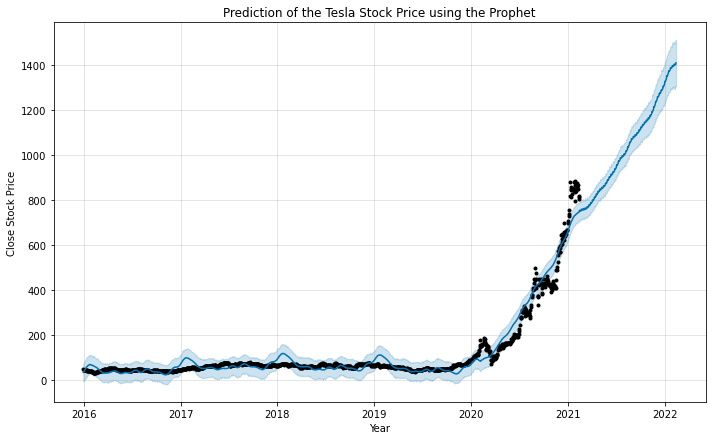

In [26]:
# Predict future values and visualise predictions
tesla_future = m.make_future_dataframe(periods=365) # Specify the number of days in future
prediction = m.predict(tesla_future)
m.plot(prediction)
plt.title("Prediction of the Tesla Stock Price using the Prophet")
plt.xlabel("Year")
plt.ylabel("Close Stock Price")
plt.show()

Model used all training data (black dots) and predicted Tesla stock price up to year 2022. Blue shadow is the confidence interval.

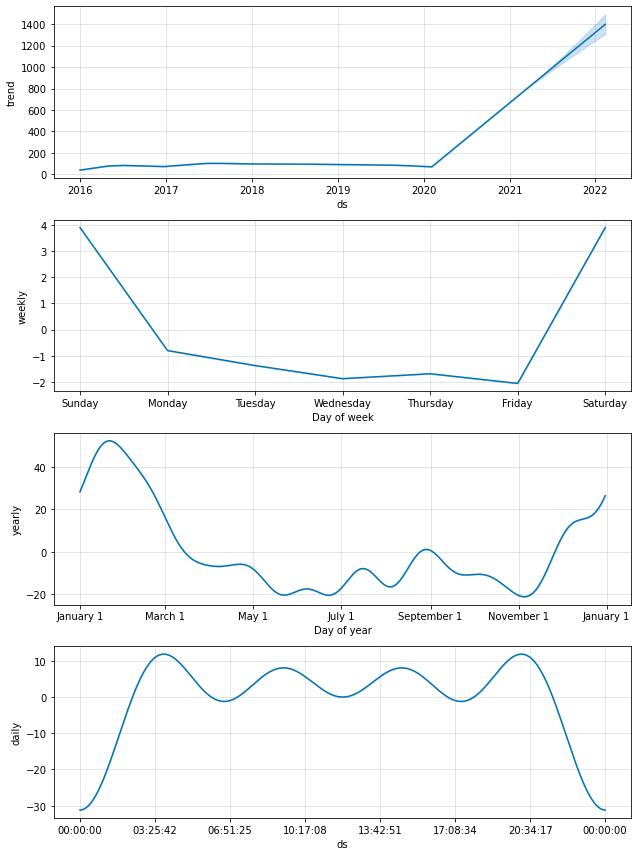

In [27]:
m.plot_components(prediction)
plt.show()

Get error of the model by splitting data into train and test sets, fit model using training set only, predict prices of the test set and measure the error using the ground truth price values of the test set.